# ST 445 - Exercise 1

In [17]:
install.packages("readxl", repos = "http://cran.us.r-project.org")


The downloaded binary packages are in
	/var/folders/vj/5wy9tscn5qb1g47fk_9vwg_40000gn/T//RtmpzhswUb/downloaded_packages


## Question 1

In [18]:
forbes2000 <- read.csv("data/Forbes2000.csv", row.names = 1, skip = 3)

We used skip = 3 to indicate that we want to skip the first three rows, which
are just some text introducing the data set. We used row.names = 1 to indicate
the row names are in the first row (after we skip the first three).

In [19]:
forbes2000 <- transform(
    forbes2000,
    name = as.factor(forbes2000$name),
    country = as.factor(forbes2000$country),
    category = as.factor(forbes2000$category)
)

summary(forbes2000)
attach(forbes2000)

      rank                      name                country   
 Min.   :   1.0   ABB Group       :   1   United States :751  
 1st Qu.: 500.8   ABN-Amro Holding:   1   Japan         :316  
 Median :1000.5   ABSA Group      :   1   United Kingdom:137  
 Mean   :1000.5   ACE             :   1   Germany       : 65  
 3rd Qu.:1500.2   ACS Group       :   1   France        : 63  
 Max.   :2000.0   AEM             :   1   Canada        : 56  
                  (Other)         :1994   (Other)       :612  
                   category        sales            profits        
 Banking               : 313   Min.   :  0.010   Min.   :-25.8300  
 Diversified financials: 158   1st Qu.:  2.018   1st Qu.:  0.0800  
 Insurance             : 112   Median :  4.365   Median :  0.2000  
 Utilities             : 110   Mean   :  9.697   Mean   :  0.3811  
 Materials             :  97   3rd Qu.:  9.547   3rd Qu.:  0.4400  
 Oil & gas operations  :  90   Max.   :256.330   Max.   : 20.9600  
 (Other)            

The following objects are masked from forbes2000 (pos = 4):

    assets, category, country, marketvalue, name, profits, rank, sales




In [20]:
length(levels(country))
length(levels(category))

[1] 61

[1] 27

### Part a

In [21]:
print(name[order(rank)[1:10]])  # Top 10 ranked
print(name[order(sales, decreasing = TRUE)[1:10]])  # 10 maximum sales
print(name[marketvalue > 174])  # Market value > $174 billion

 [1] Citigroup           General Electric    American Intl Group
 [4] ExxonMobil          BP                  Bank of America    
 [7] HSBC Group          Toyota Motor        Fannie Mae         
[10] Wal-Mart Stores    
2000 Levels: ABB Group ABN-Amro Holding ABSA Group ACE ACS Group AEM ... voestalpine
 [1] Wal-Mart Stores         BP                      ExxonMobil             
 [4] General Motors          Ford Motor              DaimlerChrysler        
 [7] Toyota Motor            General Electric        Royal Dutch/Shell Group
[10] Total                  
2000 Levels: ABB Group ABN-Amro Holding ABSA Group ACE ACS Group AEM ... voestalpine
 [1] Citigroup           General Electric    American Intl Group
 [4] ExxonMobil          HSBC Group          Wal-Mart Stores    
 [7] Pfizer              Microsoft           Intel              
[10] Vodafone           
2000 Levels: ABB Group ABN-Amro Holding ABSA Group ACE ACS Group AEM ... voestalpine


### Part b

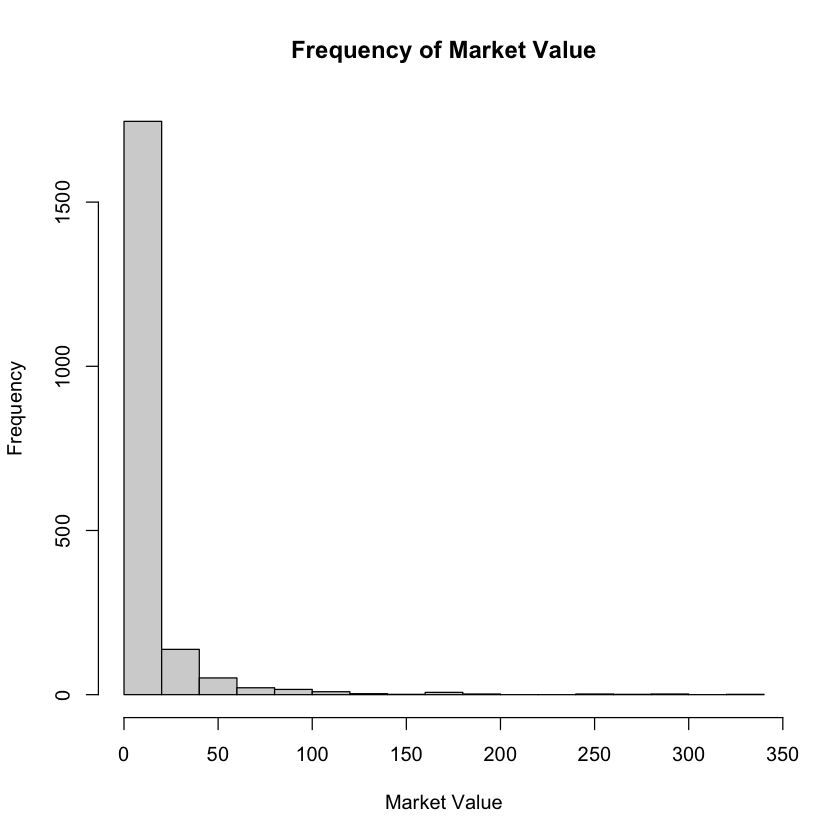

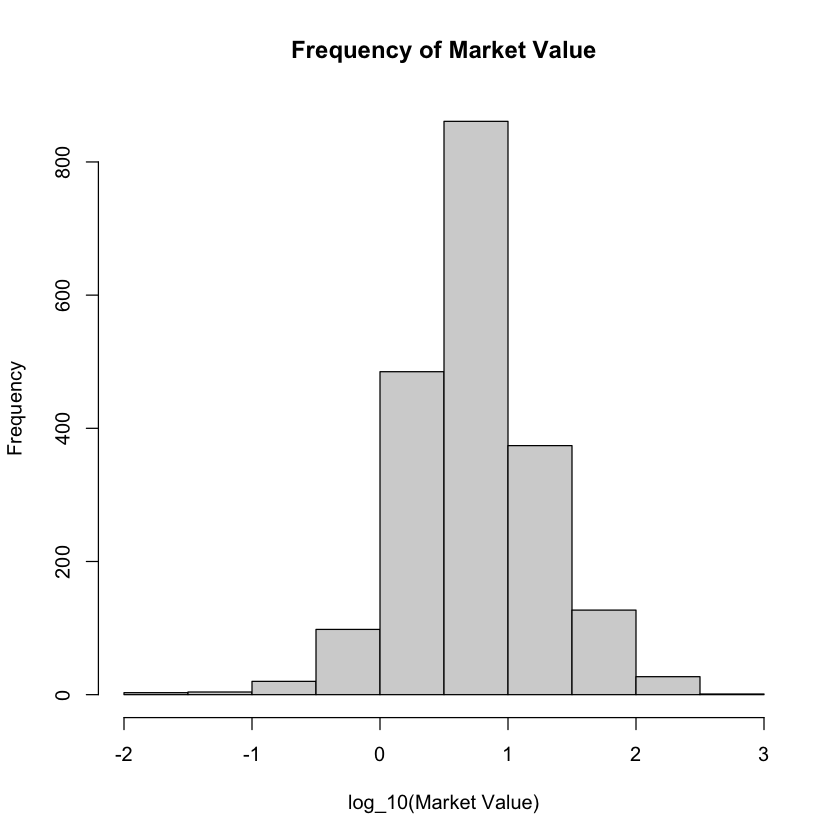

In [22]:
hist(marketvalue,
    xlab = "Market Value",
    main = "Frequency of Market Value"
)
hist(
    log(marketvalue) / log(10),
    xlab = "log_10(Market Value)",
    main = "Frequency of Market Value"
)

These plots show that the logarithm of market value follows a normal distribution, which makes more sense than market value itself following a normal distribution because it spans several orders of magnitude.

### Part c

In [23]:
mean(profits)
mean(profits, na.rm = TRUE)

[1] NA

[1] 0.3811328

mean(profits) is NaN because the profits field contains missing values, over
which the computer cannot compute the sum. By passing na.rm = TRUE we tell
the computer to ignore these missing values.

### Part d

In [24]:
median(profits[country == "United States"], na.rm = TRUE)
median(profits[country == "United Kingdom"], na.rm = TRUE)

[1] 0.24

[1] 0.205

### Part e

In [25]:
print(name[country == "Germany" & profits < 0])

 [1] Allianz Worldwide       Deutsche Telekom        E.ON                   
 [4] HVB-HypoVereinsbank     Commerzbank             Infineon Technologies  
 [7] BHW Holding             Bankgesellschaft Berlin W&W-Wustenrot          
[10] mg technologies         Nurnberger Beteiligungs SPAR Handels           
[13] Mobilcom               
2000 Levels: ABB Group ABN-Amro Holding ABSA Group ACE ACS Group AEM ... voestalpine


### Part f

In [26]:
sort(table(category[country == "Bermuda"]), decreasing = TRUE)[1]

Insurance 
       10

### Part g

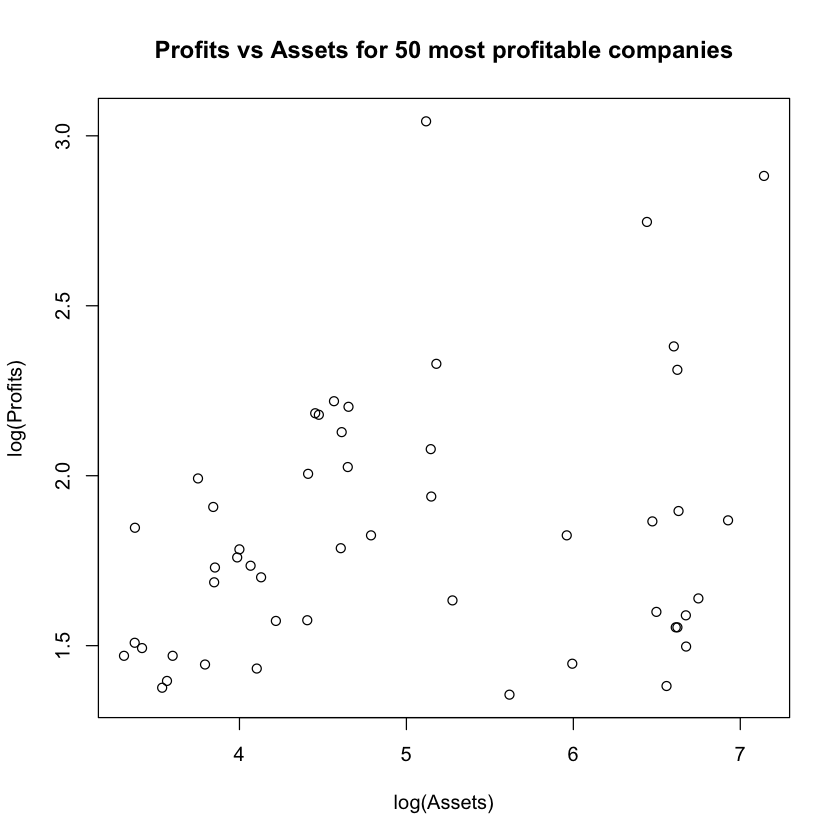

In [27]:
most_prof <- forbes2000[order(profits, decreasing = TRUE)[1:50], ]
plot(
    log(most_prof$assets),
    log(most_prof$profits),
    xlab = "log(Assets)",
    ylab = "log(Profits)",
    main = "Profits vs Assets for 50 most profitable companies"
)


## Question 2

### Part a

Using $F(x) = G((x - a)/b)$, we can compute $F^{-1}(p) = bG^{-1}(p) + a$. The qq-plot shows $F^{-1}(p)$ against $G^{-1}(p)$ parametrised by $p$, so let $x = G^{-1}(p)$ and $y = F^{-1}(p)$ then the plot follows $y = bx + a$, which is a straight line.

### Part b

In [28]:
install.packages("readxl")
library("readxl")


The downloaded binary packages are in
	/var/folders/vj/5wy9tscn5qb1g47fk_9vwg_40000gn/T//RtmpzhswUb/downloaded_packages


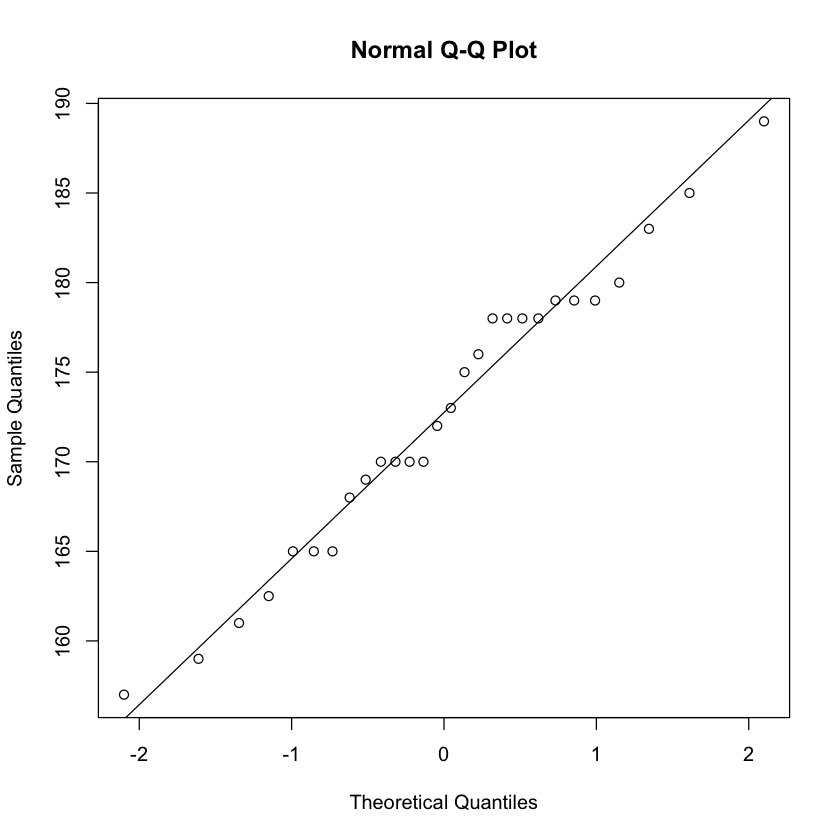

In [29]:
height <- read_xlsx("data/ST447height.xlsx")
height <- transform(
    height,
    Gender = as.factor(height$Gender)
)

qqnorm(height$Height)
qqline(height$Height)

The data appear to follow normal-distributed because the qq-plot shows a straight line compared to the theoretical normal distribution.

## Question 3

### Part a

$\sum (X_i - a)^2 = \sum (X_i - \bar{X}_n + \bar{X}_n - a)^2 = \sum (X_i - \bar{X}_n)^2 + \sum(\bar{X}_n - a)^2 + 2 \sum(X_i - \bar{X}_n)(\bar{X}_n - a)$

$= (n - 1) S_n^2 + n(\bar{X}_n - a)^2 + 2(\bar{X}_n - a)\sum(X_i - \bar{X}_n)$

$\bar{X}_n = n^{-1} \sum X_i \Rightarrow n\bar{X}_n = \sum \bar{X}_n = \sum X_i \Rightarrow \sum(X_i - \bar{X}_n) = 0$

$\therefore \sum (X_i - a)^2 = (n - 1) S_n^2 + n(\bar{X}_n - a)^2$

This shows that the sample mean is the reference point that minimises the standard deviation; that is, the mean-squared distance between points and a reference is minimised when using the sample mean.

### Part b
A consistent estimator for the coefficient of variation is $\hat{c}_v = S_n/\bar{X}_n$.

## Question 4

### Part a
Estimator: $\hat{\theta} = \bar{X}_n - \bar{Y}_m$

Standard Error: $\textrm{SE}(\hat{\theta}) = [\textrm{SE}(\hat{X}_n)^2 + \textrm{SE}(\hat{Y}_m)^2]^{1/2} = [n^{-1}\bar{X}_n(1-\bar{X}_n) + m^{-1}\bar{Y}_m(1-\bar{Y}_m)]^{1/2}$

### Part b
$\mathcal{L}(p, q; X, Y) = p(X, Y | p, q) = (\prod p(X_i))(\prod p(Y_i)) = p^{\sum X_i}(1-p)^{n-\sum X_i} q^{\sum Y_i} (1-q)^{m-\sum Y_i}$

$\mathcal{L}(\theta; X, Y) = \int_0^1 dq \mathcal{L}(p, q; X, Y)$ where $p = q + \theta$

$\mathcal{L}(\theta; X, Y) = \int_0^1 dq (q + \theta)^{\sum X_i}(1-q-\theta)^{n-\sum X_i} q^{\sum Y_i} (1-q)^{m-\sum Y_i}$.

To find a $95\%$ confidence interval, we can compute values $c_1$ and $c_2$ so that $\int_{c_1}^{c_2} \mathcal{L}(\theta; X, Y) d\theta = 0.95$; particularly where $\int_{-\infty}^{c_1} \mathcal{L}(\theta; X, Y) d\theta = 0.025$ and $\int_{c_2}^{\infty} \mathcal{L}(\theta; X, Y) d\theta = 0.025$

#### Approximate
We can use the assumption that $\bar{X}_n$ and $\bar{Y}_m$ follow normal distributions when $n$ and $m$ are large, so the difference $\hat{\theta} = \bar{X}_n - \bar{Y}_m$ does as well, particularly $\hat{\theta} \sim \mathcal{N}(p - q, \textrm{SE}(\hat{\theta})^2) = \mathcal{N}(p - q, n^{-1}\bar{X}_n(1-\bar{X}_n) + m^{-1}\bar{Y}_m(1-\bar{Y}_m))$. Thus, we can construct a $95\%$ confidence interval of the estimate $\hat{\theta}$ plus/minus two standard errors.

## Question 5

This is the same as Question 4 with $n = m = 100$ and $\sum X_i = 90$ and $\sum Y_i = 85$.

Estimate: $\hat{\theta} = \bar{X}_n - \bar{Y}_n = \boxed{0.05}$.

Standard Error: $\textrm{SE}(\hat{\theta}) = [n^{-1}\bar{X}_n(1-\bar{X}_n) + m^{-1}\bar{Y}_m(1-\bar{Y}_m)]^{1/2} = [(0.9)(0.1)/100 + (0.85)(0.15)/100]^{1/2} = \boxed{0.0466}$

$80\%$ Confidence Interval:

$\mathcal{L}(\theta; X, Y) = \int_0^1 dq (q + \theta)^{90} (1 - q - \theta)^{10} q^{85} (1 - q)^{15}$

In [30]:
# Find the likelihood (PDF) of theta based on the data 
pdf_ <- function(t) {
    integrand <- function(q) {
        exp(90*log(q + t) + 10*log(1 - q - t) + 85*log(q) + 15*log(1 - q))
    }
    return(integrate(integrand, lower = max(0, -t), upper = 1 - max(0, t))$value)
}

# Crude function to compute integral over PDF.
# R does not like putting integrate inside integrate.
int <- function(func, lower, upper, step = 0.01) {
    ts <- seq(lower, upper, step)
    sum <- 0

    for (t in ts) {
        sum <- sum + func(t) * step
    }

    return(sum)
}

# Regularisation term (integral of PDF over entire support).
reg <- int(pdf_, -1, 1)

# Find the CDF by integrating over PDF.
cdf_ <- function(t) {int(pdf_, -1, t, 0.01) / reg}

# Find inverse CDF at 0.1, 0.9 to get 80% confidence interval.
optimize(function(t) {(cdf_(t) - 0.1)^2}, interval = c(-1, 1))$minimum
optimize(function(t) {(cdf_(t) - 0.9)^2}, interval = c(-1, 1))$minimum

# Compare to interval based on normality of estimate
0.05 + qnorm(0.1) * 0.0466
0.05 + qnorm(0.9) * 0.0466

[1] -0.0131101

[1] 0.1219111

[1] -0.009720303

[1] 0.1097203

$80\%$ Confidence Interval: $\theta \in [-0.013, 0.122]$ is close to the approximate $\theta \in [-0.010, 0.110]$.

In [31]:
# Find inverse CDF at 0.025, 0.975 to get 95% confidence interval.
optimize(function(t) {(cdf_(t) - 0.025)^2}, interval = c(-1, 1))$minimum
optimize(function(t) {(cdf_(t) - 0.975)^2}, interval = c(-1, 1))$minimum

# Compare to interval based on normality of estimate
0.05 + qnorm(0.025) * 0.0466
0.05 + qnorm(0.975) * 0.0466

[1] -0.04745881

[1] 0.1409164

[1] -0.04133432

[1] 0.1413343

$95\%$ Confidence Interval: $\theta \in [-0.047, 0.141]$ is close to the approximate $\theta \in [-0.041, 0.141]$.

## Question 6

### Part a
Consider without loss of generailty $X_1, \ldots, X_n$ sorted. There are $n(n-1)/2$ possible ways of choosing $x$ and $y$ from among $X_1, \ldots, X_n$ each of which equally likely. For each $i \in \{1, \ldots, n\}$, $x = X_i$ in exactly $n - i$ combinations; particularly when $x = X_i$ and $y$ is any of the $n-i$ larger samples. The probability of $x$ being a given $X_i$ is $2/n(n-1) * (n-i) = 2(n-i)/n(n-1)$. We can use this probability mass function for $x$ as well as $\hat{F}(x) = n^{-1} \sum 1[X_i \leq x] = i/n$ where $x = X_i$. to compute
$$\mathbb{E}\hat{F}(x) = \sum 2(n-i)/n(n-1) * i/n = 2/n^2(n-1)\sum i(n-i)$$
$$\boxed{\mathbb{E}\hat{F}(x) = (n+1)/3n \approx 1/3 \text{ for large } n}$$

Now consider $\mathbb{V}\hat{F}(x) = \mathbb{E}\hat{F}(x)^2 - (\mathbb{E}\hat{F}(x))^2$. The first term we can compute just as before
$$\mathbb{E}\hat{F}(x)^2 = \sum 2(n-i)/n(n-1) * (i/n)^2 = 2/n^3(n-1) \sum i^2(n-i) = (n+1)/6n$$
$$\boxed{\mathbb{V}\hat{F}(x) = (n^2 - n + 2)/18n^2 \approx 1/18 \text{ for large } n}$$

### Part b
$$\textrm{Cov}(\hat{F}(x), \hat{F}(y)) = \mathbb{E}\hat{F}(x)\hat{F}(y) - \mathbb{E}\hat{F}(x)\mathbb{E}\hat{F}(y)$$
Just as we found $\mathbb{E}\hat{F}(x)$, we can find $\mathbb{E}\hat{F}(y) = 2/n^2(n-1)\sum i(i-1) = 2(n+1)/3n$. Now to find $\mathbb{E}\hat{F}(x)$ we can some over all possible combinations $x, y$ and multiply their probability ($2/n(n-1)$) by the product of $\hat{F}(x) = i/n$ and $\hat{F}(y) = j/n$ where $x = X_i$ and $y = X_j$.
$$\mathrm{E}\hat{F}(x)\hat{F}(y) = 2/n^3(n-1)\sum_{i < j} ij = (3n^2 + 5n + 2)/12n^2$$
$$\boxed{\textrm{Cov}(\hat{F}(x), \hat{F}(y)) = (n^2 - n - 2)/36n^2}$$

### Part c
Since $\hat{F}(x)$ is a mean, $\hat{F}(x) \overset{\mathcal{D}}{\to} \mathcal{N}(\mathbb{E}\hat{F}(x), \mathbb{V}\hat{F}(x))$ as $n \to \infty$, so $\boxed{\hat{F}(x) \overset{\mathcal{D}}{\to} \mathcal{N}(1/3, 1/18)}$.

An approximate $1 - \alpha$ confidence interval for $\hat{F}(x)$ is $\boxed{1/3 \pm (\sqrt{2}/6)\Phi^{-1}(\alpha/2)}$ where $\Phi$ is the standard normal cumulative distribution function.

### Part d
$$\textrm{SD}(\hat{\theta})^2 = \mathbb{E}(\hat{\theta} - \theta)^2 = \mathbb{E}((\hat{F}(y) - F(y)) - (\hat{F}(x) - F(x)))^2$$

$$\textrm{SE}(\hat{\theta})^2 = \mathbb{E}(\hat{\theta} - \mathbb{E}\hat{\theta})^2 = \mathbb{E}((\hat{F}(y) - \mathbb{E}\hat{F}(y)) - (\hat{F}(x) - \mathbb{E}\hat{F}(x)))^2$$
$$ = \mathbb{E}(\hat{F}(y) - \mathbb{E}\hat{F}(y))^2 + \mathbb{E}(\hat{F}(x) - \mathbb{E}\hat{F}(x))^2 - 2\mathbb{E}(\hat{F}(x) - \mathbb{E}\hat{F}(x))(\hat{F}(y) - \mathbb{E}\hat{F}(y))$$
$$ = \mathbb{V} \hat{F}(x) + \mathbb{V} \hat{F}(y) - 2\textrm{Cov}(\hat{F}(x), \hat{F}(y))$$